In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss

In [2]:
with open('alexa_reviews_clean.pkl','rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive


## WordCloud

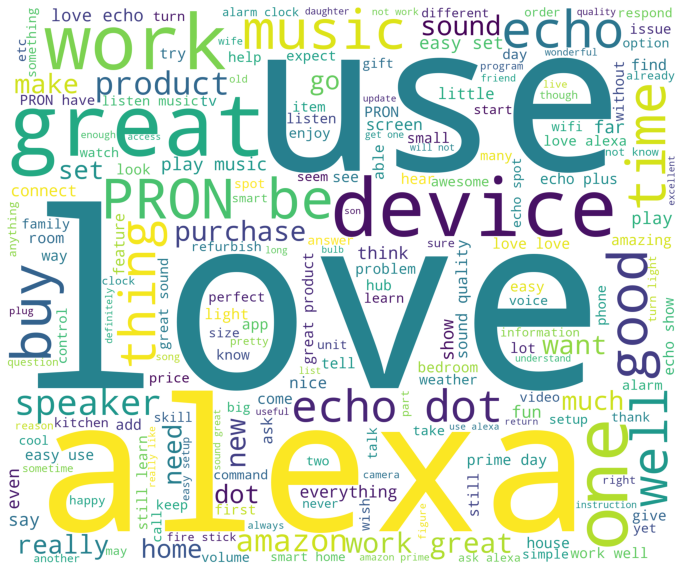

In [4]:
corpus_cloud = ' '.join(df['new_reviews'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("wordcloud.jpg")
plt.show()

# Corpus

In [5]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict_alex = {}

for doc in df['new_reviews']:
    for word in doc.split():
        if word in count_dict_alex.keys():
            count_dict_alex[word] +=1
        else:
            count_dict_alex[word] = 1
            
for key, value in sorted(count_dict_alex.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

dinosaur: 1
category: 1
grandaughter: 1
2000: 1
mile: 1
timermusic: 1
duty: 1
boost: 1
definitively: 1
input: 1
select: 1
encyclopedia: 1
greatit: 1
thermostatand: 1
lightswithout: 1
chair: 1
dislikes: 1
pauses: 1
pattern: 1
promp: 1
poop: 1
joke34: 1
naw: 1
outsmart: 1
echosecho: 1
6th: 1
divertido: 1
1000: 1
speaknspell: 1
iove: 1
soundgood: 1
fm: 1
native: 1
americans: 1
whose: 1
texas: 1
birth: 1
additionally: 1
marginal: 1
extender: 1
ten: 1
disconnected: 1
dust: 1
collector: 1
broken: 1
34fixes34: 1
satisfy: 1
34never: 1
34certified: 1
acknowledge: 1
indicate: 1
perfectlyvery: 1
productsand: 1
journey: 1
daytoday: 1
surely: 1
portion: 1
leary: 1
puny: 1
wear: 1
tear: 1
mint: 1
teenager: 1
insist: 1
yelling: 1
dinneras: 1
lifechange: 1
simplicity: 1
gazebo: 1
sortof: 1
complaini: 1
charging: 1
timework: 1
diagnostic: 1
roomba: 1
sentence: 1
onehonestly: 1
productonce: 1
itthis: 1
shocked: 1
clone: 1
boat: 1
garage: 1
loli: 1
gf: 1
intermittently: 1
pulsate: 1
pulse: 1
buddy: 1
eas

maximize: 2
recent: 2
watching: 2
eco: 2
trigger: 2
34she34: 2
mark: 2
post: 2
argument: 2
incredible: 2
4k: 2
recording: 2
history: 2
upon: 2
baffle: 2
eventually: 2
f: 2
wealth: 2
hole: 2
demand: 2
friday: 2
sorry: 2
address: 2
lazy: 2
originally: 2
decorate: 2
vehicle: 2
afraid: 2
engage: 2
accuracy: 2
ass: 2
expand: 2
smooth: 2
happier: 2
powercord: 2
strongly: 2
frustration: 2
headphone: 2
devices: 2
lean: 2
forum: 2
adapt: 2
n: 2
description: 2
updates: 2
galaxy: 2
oop: 2
vision: 2
wanted: 2
beginner: 2
configure: 2
bff: 2
pound: 2
confused: 2
plane: 2
tivo: 2
reorder: 2
lamps: 2
den: 2
ceiling: 2
disarm: 2
ge: 2
importantly: 2
bye: 2
remain: 2
buld: 2
xfinity: 2
spin: 2
italy: 2
samsung: 2
disabled: 2
anybody: 2
speedy: 2
operator: 2
19: 2
wave: 2
overdriven: 2
technologyi: 2
island: 2
knob: 2
34first: 2
34second: 2
clue: 2
smartthing: 2
girlfriend: 2
expire: 2
kodi: 2
keyboard: 2
worked: 2
buffer: 2
cutting: 2
ditch: 2
sling: 2
buffering: 2
cbs: 2
theater: 2
fat: 2
interactive:

In [6]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict_alex.keys() if count_dict_alex[key] < low_value]

In [7]:
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in df['new_reviews']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])

In [8]:
clean_list

[['love', 'echo'],
 ['love'],
 ['sometimes',
  'play',
  'game',
  'answer',
  'question',
  'correctly',
  'alexa',
  'say',
  'get',
  'wrong',
  'answer',
  'like',
  'able',
  'turn',
  'light',
  'away',
  'home'],
 ['lot',
  'fun',
  'thing',
  '4',
  'old',
  'learn',
  'control',
  'light',
  'play',
  'game',
  'like',
  'nice',
  'sound',
  'play',
  'music',
  'well'],
 ['music'],
 ['receive',
  'echo',
  'gift',
  'need',
  'another',
  'bluetooth',
  'something',
  'play',
  'music',
  'easily',
  'find',
  'smart',
  'speaker',
  'can',
  'not',
  'wait',
  'see',
  'else'],
 ['without',
  'can',
  'not',
  'use',
  'many',
  'feature',
  'see',
  'use',
  'great',
  'alarm',
  'u',
  'almost',
  'hear',
  'alarm',
  'bedroom',
  'living',
  'room',
  'reason',
  'enough',
  'keep',
  'fun',
  'ask',
  'question',
  'hear',
  'response',
  'seem',
  'yet'],
 ['think',
  'one',
  '-PRON-',
  'have',
  'purchase',
  '-PRON-',
  'be',
  'work',
  'get',
  'one',
  'every',
 

In [9]:
# USE CLEAN_LIST TO CREATE CORPUS
corpus=[]
for item in clean_list:
    item = ' '.join(item)
    corpus.append(item)
    
corpus

['love echo',
 'love',
 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home',
 'lot fun thing 4 old learn control light play game like nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily find smart speaker can not wait see else',
 'without can not use many feature see use great alarm u almost hear alarm bedroom living room reason enough keep fun ask question hear response seem yet',
 'think one -PRON- have purchase -PRON- be work get one every room house really like feature offer play music echo control light throughout house',
 'look great',
 'love -PRON- have listen song have not hear since get news weather information great',
 'send year old dad talk constantly',
 'love learning know thing still figure everything work far easy use understand make laugh time',
 'purchase mother problem give something try come get around fast like enjoy little big thing play song time cook',


# LDA

In [10]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from nltk.corpus import stopwords

In [11]:
clean_list[0][:5]

['love', 'echo']

In [30]:
# CREATE THE INPUTS OF LDA MODEL: DICTIONARY AND CORPUS
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(line) for line in clean_list]

In [31]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)

# See the topics
lda_model.print_topics(-1)

[(0,
  '0.046*"not" + 0.028*"great" + 0.027*"do" + 0.026*"alexa" + 0.021*"love" + 0.019*"work" + 0.017*"use" + 0.016*"music" + 0.016*"get" + 0.016*"product"'),
 (1,
  '0.022*"echo" + 0.022*"like" + 0.020*"well" + 0.020*"work" + 0.017*"device" + 0.015*"use" + 0.015*"alexa" + 0.014*"get" + 0.014*"one" + 0.013*"good"'),
 (2,
  '0.062*"love" + 0.042*"echo" + 0.031*"easy" + 0.028*"use" + 0.027*"dot" + 0.026*"great" + 0.026*"sound" + 0.023*"set" + 0.021*"speaker" + 0.020*"music"')]

# Word2Vec

In [14]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

In [15]:
# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(clean_list, min_count = 0, workers=cpu_count())

# Get the word vector for given word
model['sound']

model.most_similar('sound')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('speaker', 0.9997689127922058),
 ('product', 0.9997540712356567),
 ('screen', 0.9997418522834778),
 ('much', 0.999718427658081),
 ('see', 0.9997044801712036),
 ('device', 0.9996993541717529),
 ('small', 0.9996956586837769),
 ('seem', 0.99969482421875),
 ('go', 0.9996939897537231),
 ('almost', 0.9996916055679321)]

# Bigram

In [16]:
dct = corpora.Dictionary(clean_list)
corpus = [dct.doc2bow(line) for line in clean_list]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(clean_list, min_count=3, threshold=10)

# Construct bigram
print(bigram[clean_list[1]])

['love']


# Vader

In [17]:
analyser = SentimentIntensityAnalyzer()

In [18]:
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results

In [19]:
sentiment = sentimentScore(df['new_reviews'])


{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.141, 'neu': 0.636, 'pos': 0.223, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.926}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.591, 'pos': 0.409, 'compound': 0.8555}
{'neg': 0.106, 'neu': 0.722, 'pos': 0.172, 'compound': 0.5945}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.6361}
{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8519}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.8934}
{'neg': 0.094, 'neu': 0.625, 'pos': 0.281, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.9274}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.416, 'neu': 0.112, 'pos': 0.472, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.262, 'pos': 0.738, 'compoun

{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9872}
{'neg': 0.0, 'neu': 0.275, 'pos': 0.725, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}
{'neg': 0.115, 'neu': 0.767, 'pos': 0.118, 'compound': 0.2716}
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.8885}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.7003}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.2023}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.3818}
{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.4215}
{'neg': 0.077, 'neu': 0.714, 'pos': 0.209, 'compound': 0.5547}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.286, 'pos'

{'neg': 0.161, 'neu': 0.538, 'pos': 0.3, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.9081}
{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.5367}
{'neg': 0.056, 'neu': 0.791, 'pos': 0.153, 'compound': 0.5705}
{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6597}
{'neg': 0.144, 'neu': 0.57, 'pos': 0.285, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.265, 'pos': 0.735, 'compound': 0.9022}
{'neg': 0.159, 'neu': 0.476, 'pos': 0.365, 'compound': 0.3818}
{'neg': 0.109, 'neu': 0.545, 'pos': 0.346, 'compound': 0.6997}
{'neg': 0.123, 'neu': 0.584, 'pos': 0.292

{'neg': 0.067, 'neu': 0.635, 'pos': 0.298, 'compound': 0.7024}
{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.6369}
{'neg': 0.037, 'neu': 0.768, 'pos': 0.195, 'compound': 0.8367}
{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.213, 'neu': 0.43, 'pos': 0.357, 'compound': 0.6531}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.6808}
{'neg': 0.086, 'neu': 0.55, 'pos': 0.364, 'compound': 0.8442}
{'neg': 0.06, 'neu': 0.752, 'pos': 0.188, 'compound': 0.8176}
{'neg': 0.0, 'neu': 0.091, 'pos': 0.909, 'compound': 0.875}
{'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'compound': 0.8481}
{'neg': 0.14, 'neu': 0.569, 'pos': 0.292, 'compound': 0.4833}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'compound': 0.7778}
{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.8957}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.192, 'pos': 0.80

{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.2732}
{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.6808}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.8519}
{'neg': 0.245, 'neu': 0.476, 'pos': 0.279, 'compound': 0.2514}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.4201}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.227, 'neu': 0.668, 'pos': 0.104, 'compound': -0.4471}
{'neg': 0.057, 'neu': 0.608, 'pos': 0.335, 'compound': 0.9578}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.

In [20]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.192,0.808,0.6369
1,0.000,0.000,1.000,0.6369
2,0.141,0.636,0.223,0.2023
3,0.000,0.456,0.544,0.9260
4,0.000,1.000,0.000,0.0000


In [21]:
# align index to copy rating column for joining
df.index = sentiment_df.index
sentiment_df['rating'] = df['rating']
echo_vader = pd.concat([df, sentiment_df], axis=1)
echo_vader.head()

,rating,date,variation,verified_reviews,feedback,review_length,new_reviews,sentiment,neg,neu,pos,compound,rating
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo,positive,0.000,0.192,0.808,0.6369,5
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love,positive,0.000,0.000,1.000,0.6369,5
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,sometimes play game answer question correctly ...,positive,0.141,0.636,0.223,0.2023,4
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,lot fun thing 4 yr old learn dinosaur control ...,positive,0.000,0.456,0.544,0.9260,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,music,positive,0.000,1.000,0.000,0.0000,5


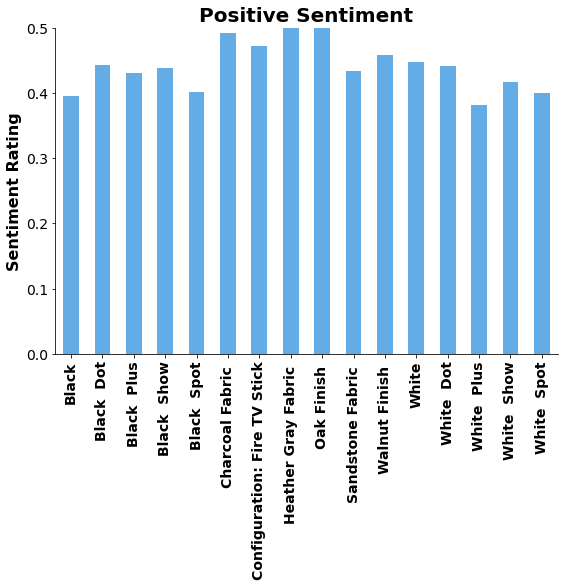

''

<Figure size 432x288 with 0 Axes>

In [22]:
#postive sentiment
color = ['#63ace5']
ax = echo_vader.groupby("variation").pos.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Positive Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='90', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('postive_sentiment.jpg')
;

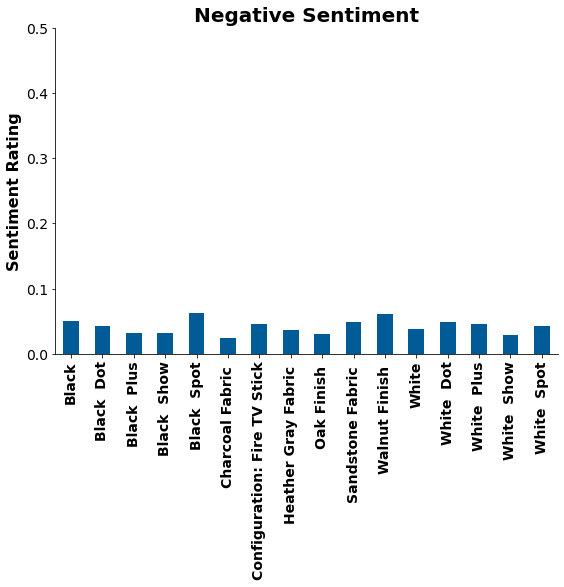

''

<Figure size 432x288 with 0 Axes>

In [23]:
#postive sentiment
color = ['#005b96']
ax = echo_vader.groupby("variation").neg.mean().plot.bar(color = color, figsize = (9, 6))

plt.title('Negative Sentiment', fontsize = 20, weight='bold')

# plt.xlabel('Variation', fontsize = 16, weight='bold')
plt.xticks(rotation='90', fontsize=14, weight='bold')
ax.xaxis.label.set_visible(False)

plt.ylabel('Sentiment Rating', fontsize=16, weight='bold')
ax.set_ylim([0,0.5])
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('negative_sentiment.jpg')
;

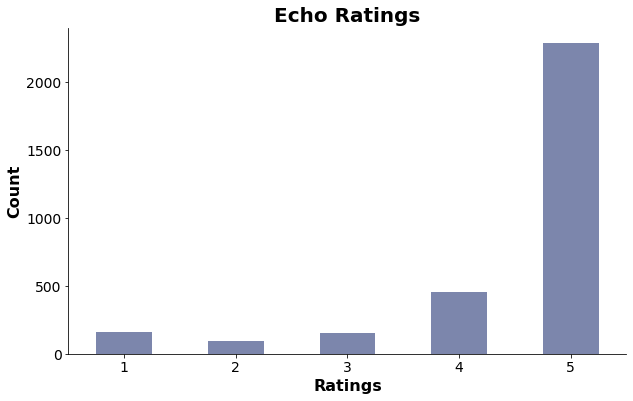

In [24]:
group = df.groupby('rating').count()
group['date']

color = plt.cm.bone(np.linspace(0, 1, 6))
ax = group['date'].plot.bar(color='#7c86ac', figsize = (10, 6))

plt.title('Echo Ratings', fontsize = 20, weight='bold')
plt.xlabel('Ratings', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize=16, weight='bold')

plt.xticks(rotation='0', fontsize=14)
plt.yticks(fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()

#change colour

# Sentiment Features

In [25]:
neg_alexa = df[df['sentiment']=='negative']
pos_alexa = df[df['sentiment']=='positive']

## Negative

In [26]:
from sklearn.feature_selection import chi2

tfidf_n = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf_n = tfidf_n.fit_transform(neg_alexa['new_reviews'])
y_n = neg_alexa['rating']
chi2score_n = chi2(X_tfidf_n, y_n)[0]

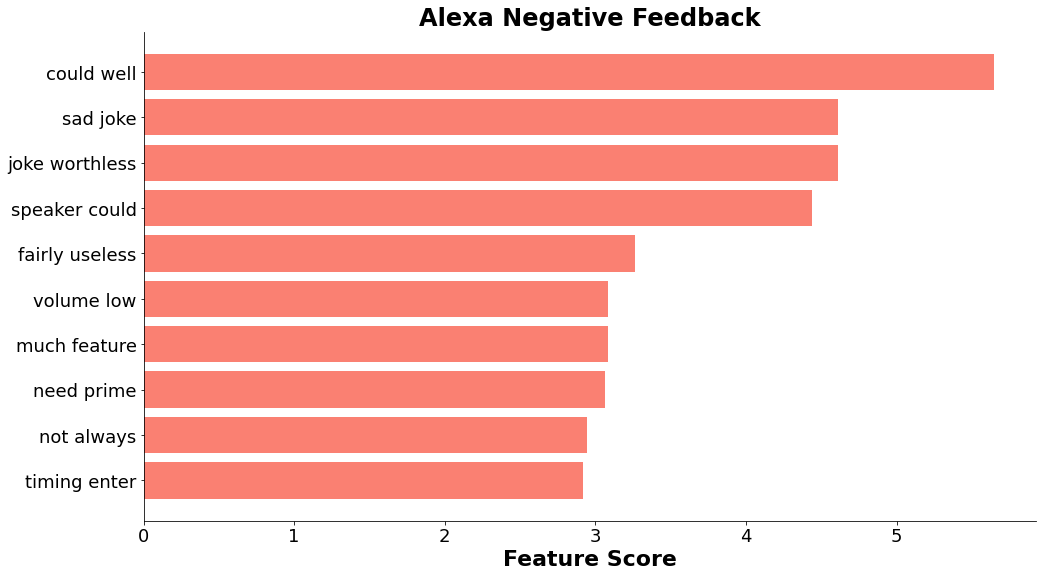

''

<Figure size 432x288 with 0 Axes>

In [27]:
scores = list(zip(tfidf_n.get_feature_names(), chi2score_n))
chi2_n = sorted(scores, key=lambda x:x[1])
topchi2_n = list(zip(*chi2_n[-10:]))
x_n=range(len(topchi2_n[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x_n, topchi2_n[1], align='center', alpha=1, color='salmon')

plt.title('Alexa Negative Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2_n[0]
plt.yticks(x_n, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('alexa_neg.jpg')
;

## Positive

In [28]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
X_tfidf = tfidf.fit_transform(pos_alexa['new_reviews'])
y = pos_alexa['rating']
chi2score = chi2(X_tfidf, y)[0]

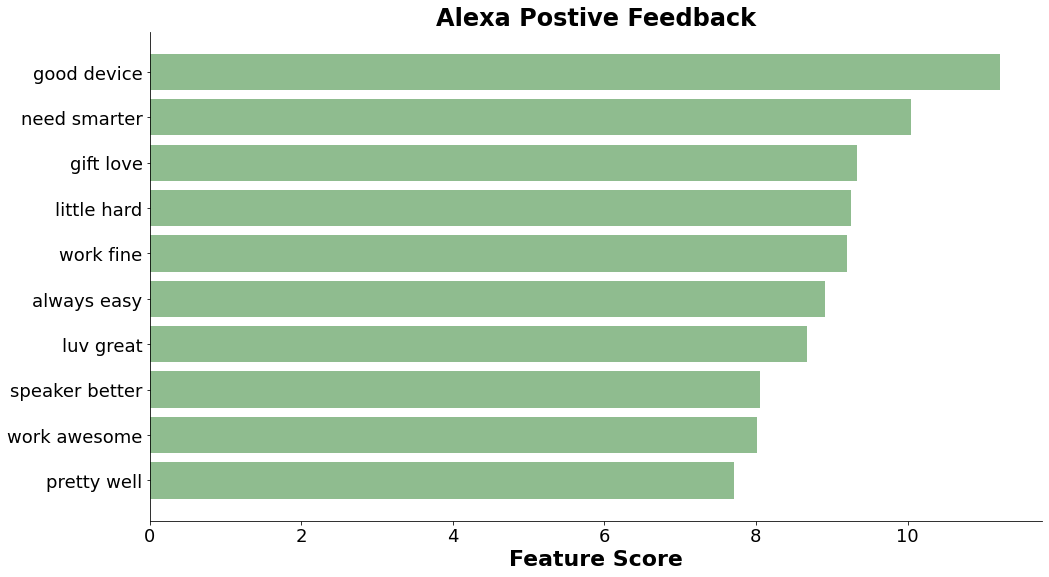

''

<Figure size 432x288 with 0 Axes>

In [29]:
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-10:]))
x=range(len(topchi2[1]))

fig, ax = plt.subplots(figsize=(16,9))
ax.barh(x,topchi2[1], alpha=1, color='darkseagreen')

plt.title('Alexa Postive Feedback', fontsize=24, weight='bold')

# x-axis
plt.xlabel("Feature Score", fontsize=22, weight='bold')
plt.xticks(fontsize=18)

#y-axis
labels = topchi2[0]
plt.yticks(x, labels, fontsize=18)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

fig = plt.gcf()
plt.show()
plt.draw()

fig.savefig('alexa_positive.jpg')
;